In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it.json"
script_name = "../scripts/run_fineweb1B_adamw_classic_fista_classic_l1.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

Some files are missing: 
{'attn_fista_adamw-lr-0.001-warm-up-cosine-10d7812c297296e5776ccbcd47b41185.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-f6f3dbc39d48622d761249a3d088452d.json'}
{'attn_max_iter': '20', 'lr': '0.001', 'momentum': 'False', 'mu_frac': '0.01', 'rho_over_lr': '5', 'warm_start': 'False'}
{'attn_max_iter': '20', 'lr': '0.001', 'momentum': 'False', 'mu_frac': '0.75', 'rho_over_lr': '50', 'warm_start': 'False'}


In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.315161,7.225343,7.316856,118784.00,57088.000,57173.825977,20,0.001,False,0.001,0.1,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.065507,4.057638,4.057638,20.75,17.125,15.740302,20,0.001,False,0.75,0.01,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.761662,3.749734,3.749734,360.00,138.000,159.116442,20,0.001,False,0.75,5,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.647106,7.639697,7.645695,1097728.00,557056.000,543979.821780,20,0.001,False,0.001,0.5,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.873822,3.863087,3.863087,7456.00,3744.000,3927.181565,20,0.001,False,0.5,10,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '10', '100', '5', '50'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:769: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:771: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


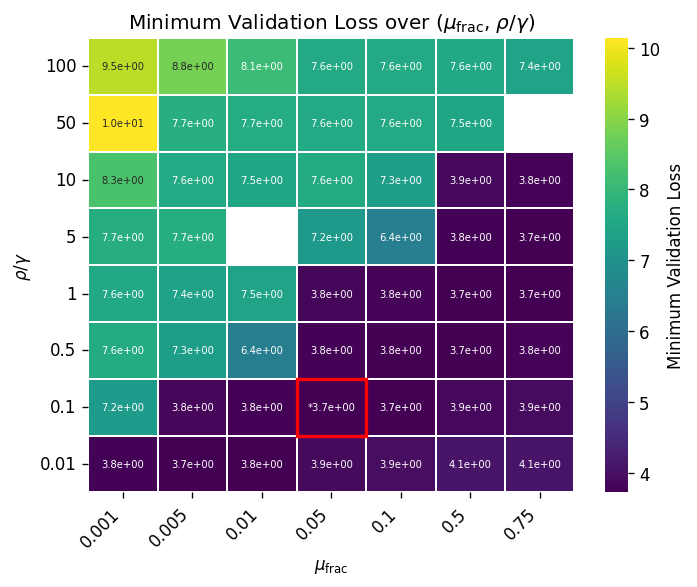

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:769: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:771: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


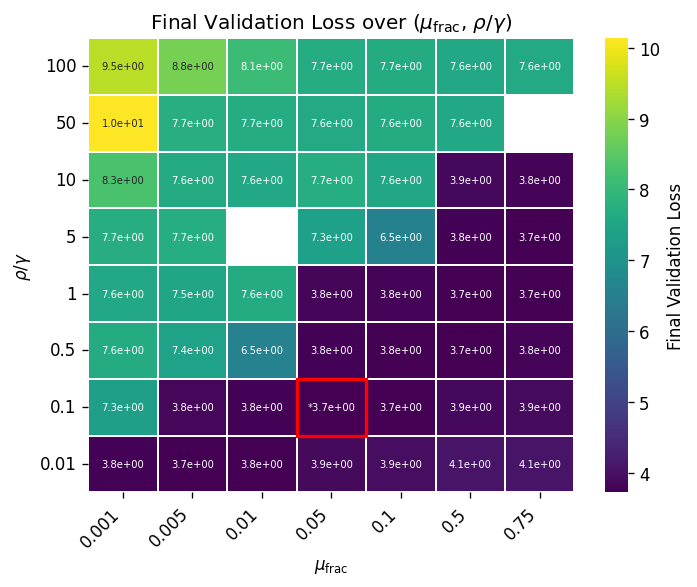

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss  kq_max mu_frac rho_over_lr
0      3.730363   91.00    0.05         0.1
1      3.731865   78.50   0.005        0.01
2      3.732121  131.00     0.5           1
3      3.735115   59.25    0.75           1
4      3.747255   50.25     0.1         0.1
5      3.749199   51.00     0.5         0.5
6      3.749734  360.00    0.75           5
7      3.751902  183.00     0.1         0.5
8      3.755255   48.75    0.01        0.01
9      3.764825  422.00   0.001        0.01


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:769: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:771: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


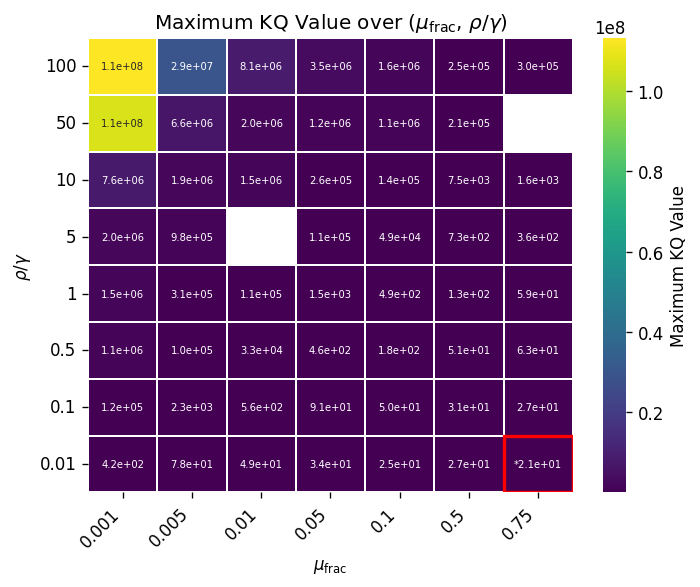

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:769: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:771: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


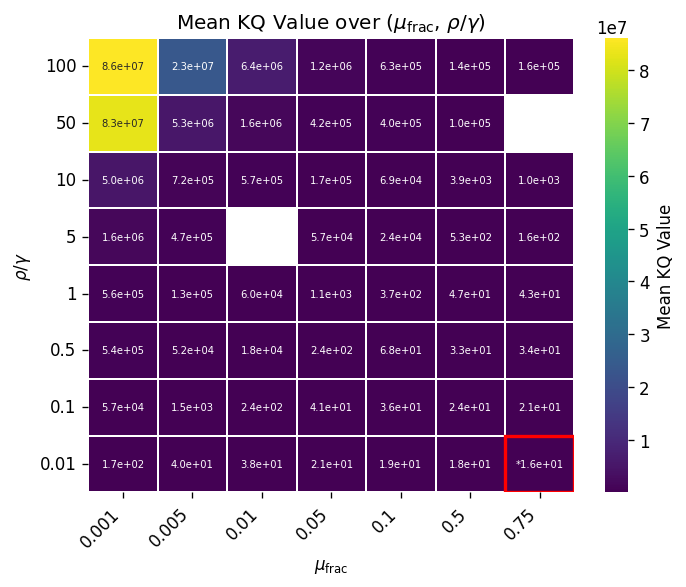

In [9]:
plot_heatmat_grid(df, value="kq_mean")